In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import joblib



In [2]:
# Chargement des données MNIST
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Data preprocessing: Normalisation des images à un intervalle de 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Diviser le jeu de données en ensembles d'entraînement et de test (70% - 30%)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

print(f'Taille de l\'ensemble d\'entraînement: {x_train.shape}')
print(f'Taille de l\'ensemble de validation: {x_val.shape}')
print(f'Taille de l\'ensemble de test: {x_test.shape}')


Taille de l'ensemble d'entraînement: (42000, 28, 28)
Taille de l'ensemble de validation: (18000, 28, 28)
Taille de l'ensemble de test: (10000, 28, 28)


Montrer les 9 premières images du training dataset et leurs labels en tant que titres:


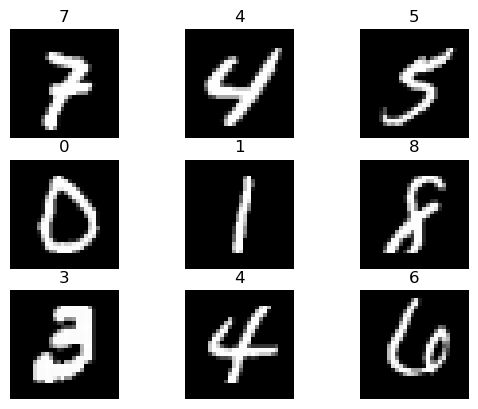

In [3]:
for i in range(0, 9, 3):
    for j in range(3):
        plt.subplot(3, 3, i + j + 1)
        plt.axis('off')
        plt.imshow(x_train[i + j], cmap='gray')
        plt.title(y_train[i + j].item())
plt.show()


In [4]:
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score

# Aplatir les images pour SVM
x_train_flat = x_train.reshape(-1, 28*28)
x_val_flat = x_val.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Créer un modèle SVM linéaire et l'entrainer 
svm_l = svm.SVC(kernel='linear')
svm_l.fit(x_train_flat, y_train)

# Prédire les résultats pour les données du test
y_pred_svm = svm_l.predict(x_test_flat)
print("Rapport de classification pour SVM:\n", classification_report(y_test, y_pred_svm))
print("Précision pour SVM:", accuracy_score(y_test, y_pred_svm))


Rapport de classification pour SVM:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.98      0.98      1135
           2       0.92      0.93      0.92      1032
           3       0.91      0.92      0.92      1010
           4       0.94      0.96      0.95       982
           5       0.91      0.90      0.90       892
           6       0.96      0.95      0.96       958
           7       0.95      0.93      0.94      1028
           8       0.92      0.90      0.91       974
           9       0.94      0.91      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

Précision pour SVM: 0.9377


In [5]:
# Créer un modèle SVM non linéaire avec un noyau polynomial
svm_p = svm.SVC(kernel='poly', degree=3)
svm_p.fit(x_train_flat, y_train)

# Prédire les résultats pour les données du test
y_pred_svm = svm_p.predict(x_test_flat)
print("Rapport de classification pour SVM:\n", classification_report(y_test, y_pred_svm))
print("Précision pour SVM:", accuracy_score(y_test, y_pred_svm))

Rapport de classification pour SVM:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Précision pour SVM: 0.9741


In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Entraîner un classificateur k-NN
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train_flat, y_train)

# Prédiction et évaluation
y_pred_knn = knn_clf.predict(x_test_flat)
print("Rapport de classification pour k-NN:\n", classification_report(y_test, y_pred_knn))
print("Précision pour k-NN:", accuracy_score(y_test, y_pred_knn))


Rapport de classification pour k-NN:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.95      1.00      0.97      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.92      0.95       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Précision pour k-NN: 0.9672


In [7]:

# Charger un modèle pré-entraîné 
model = svm_p

joblib.dump(model, 'svm_model.pkl')


['svm_model.pkl']